<font size = 8> Barnacle detenction using Image Processing. 

In [417]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from IPython.display import  display

<font size= 6> Grayscaling the image and reducing noise 

In [418]:
THRESHOLD =0.37


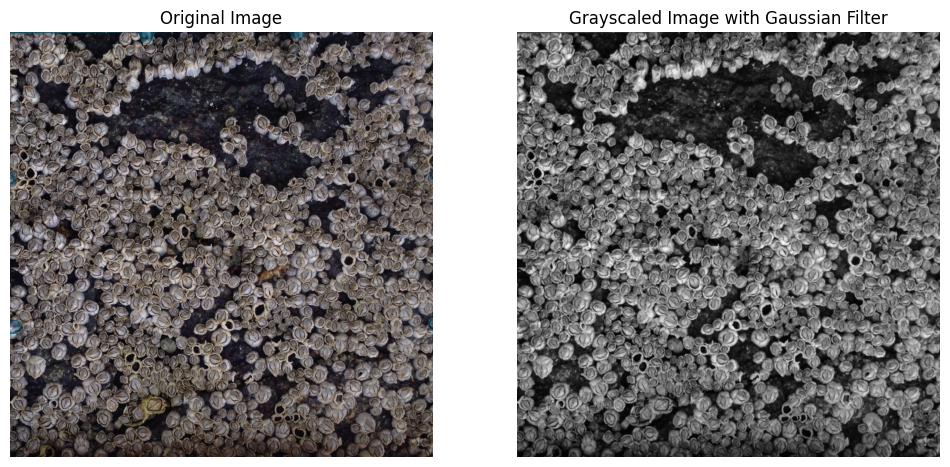

In [419]:
image = Image.open("sample_image.png").convert("RGB")
grayscale_image = image.convert("L")
image_array = np.array(grayscale_image)
gaussian_filtered_image = gaussian_filter(image_array, sigma=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gaussian_filtered_image, cmap= 'gray')
ax[1].set_title('Grayscaled Image with Gaussian Filter')
ax[1].axis('off')

plt.show()

<font size= 6> Applying Otsu's Thresholding

Obtained threshold: 80.0


(np.float64(-0.5), np.float64(1499.5), np.float64(1508.5), np.float64(-0.5))

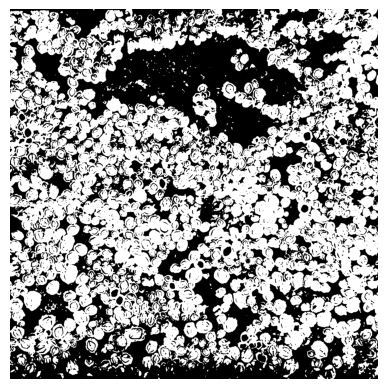

In [420]:
otsu_threshold, image_after_otsu = cv2.threshold(
gaussian_filtered_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, 
)
print("Obtained threshold:", otsu_threshold)

plt.imshow(image_after_otsu, cmap= 'gray')
plt.axis('off')


(np.float64(-0.5), np.float64(1499.5), np.float64(1508.5), np.float64(-0.5))

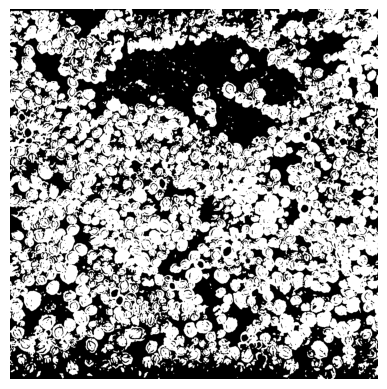

In [421]:
# noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned_image = cv2.morphologyEx(image_after_otsu, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=1)
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')

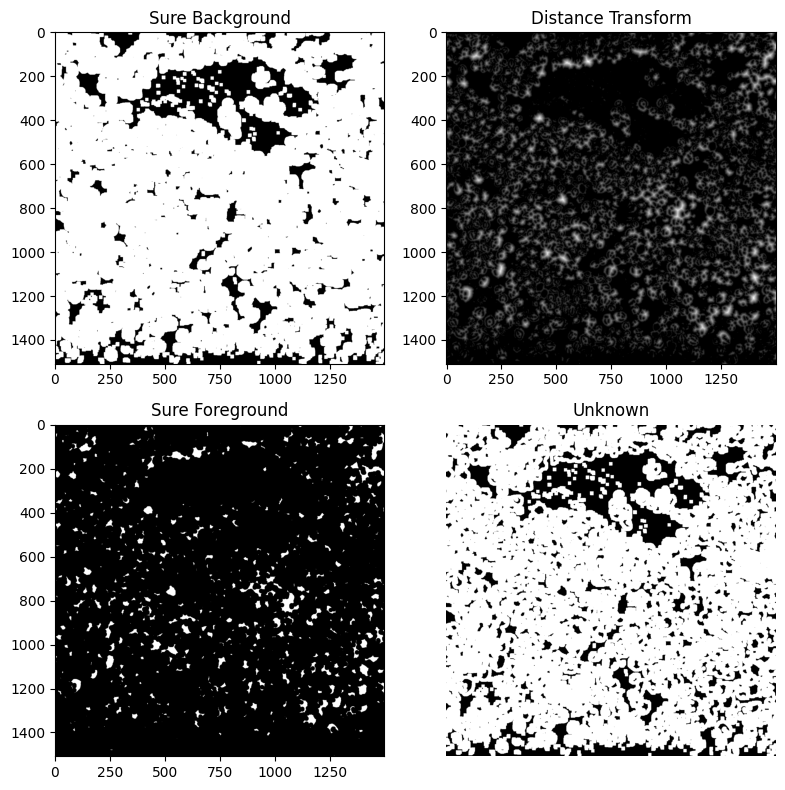

In [422]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# sure background area
intermediary_bg = cv2.dilate(cleaned_image, kernel, iterations=3)
sure_bg = cv2.dilate(intermediary_bg, kernel, iterations=3)
axes[0,0].imshow(sure_bg, cmap='gray') # Corrected line
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(cleaned_image, cv2.DIST_L2,5)
axes[0,1].imshow(dist, cmap='gray') # Corrected line
axes[0, 1].set_title('Distance Transform')

# foreground area
ret, sure_fg = cv2.threshold(dist, THRESHOLD * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
axes[1,0].imshow(sure_fg, cmap='gray') # Corrected line
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
axes[1,1].imshow(unknown, cmap='gray') # Corrected line
axes[1, 1].set_title('Unknown')

plt.tight_layout() # Adjust layout to prevent titles/labels from overlapping
plt.axis('off')
plt.show()

<font size = 5> Creating Marker Image

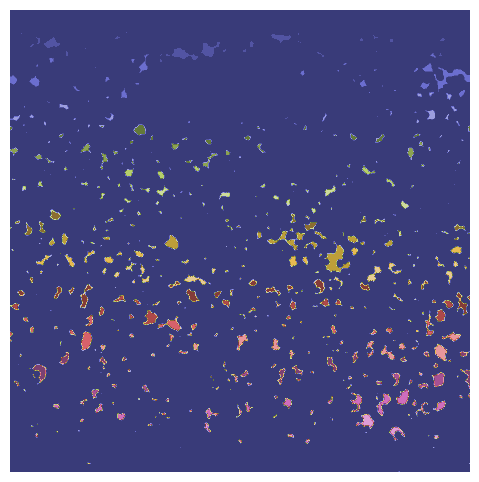

In [423]:
# Marker labelling
# sure foreground 
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

<font size =5> Applying Watershed Algorithm

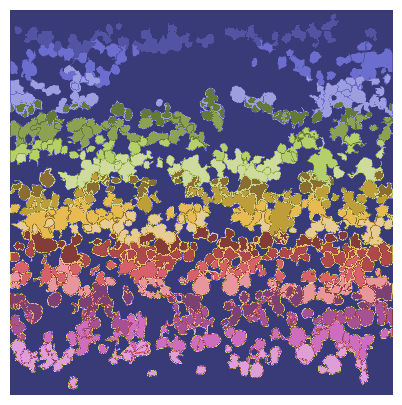

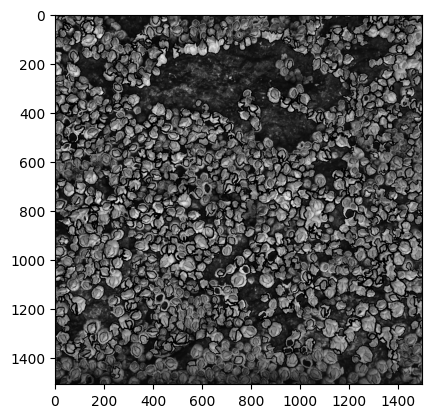

In [424]:
# watershed Algorithm
img_array = np.array(image).astype(np.uint8)
markers = cv2.watershed(img_array, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:  

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
  
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])

# Draw the outline
image = cv2.drawContours(image_array, coins, -1, color=(0, 23, 223), thickness=2)
plt.imshow(image, cmap ='grey')

In [425]:
print(f"The number of barnacles is {len(coins)}")

The number of barnacles is 622
